In [1]:
import os
import tarfile
import urllib

In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'

In [3]:
resp = urllib.request.urlopen(url)
with open('housing.tgz', 'wb') as file:
    file.write(resp.read())

In [4]:
housing_tgz = tarfile.open('housing.tgz')
housing_tgz.extractall()
housing_tgz.close()

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('housing.csv')

In [7]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.style.use('dark_background')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D857F062E8>,
      dtype=object)

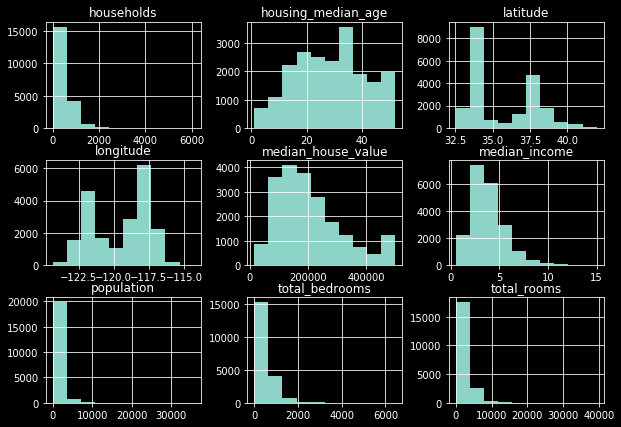

In [13]:
data.hist(figsize = (10, 7))

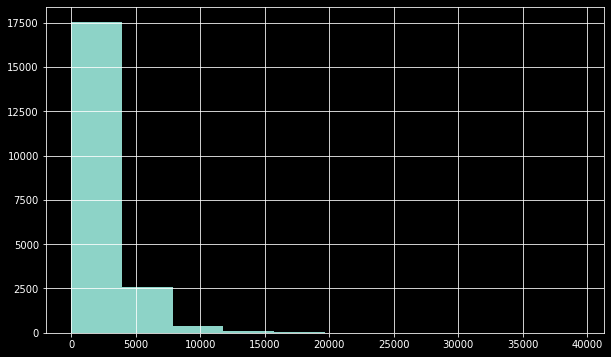

In [14]:
data['total_rooms'].hist(figsize = (10, 6))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
housing_x = data.drop('median_house_value', axis = 1)
housing_y = data.median_house_value

In [17]:
housing_x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [18]:
housing_y.name

'median_house_value'

In [19]:
x_train, x_test, y_train, y_test = train_test_split(housing_x, housing_y, test_size = 0.3)

In [20]:
x_train.shape

(14448, 9)

In [21]:
x_test.shape

(6192, 9)

In [22]:
y_train.shape

(14448,)

In [23]:
y_test.shape

(6192,)

In [24]:
import numpy as np

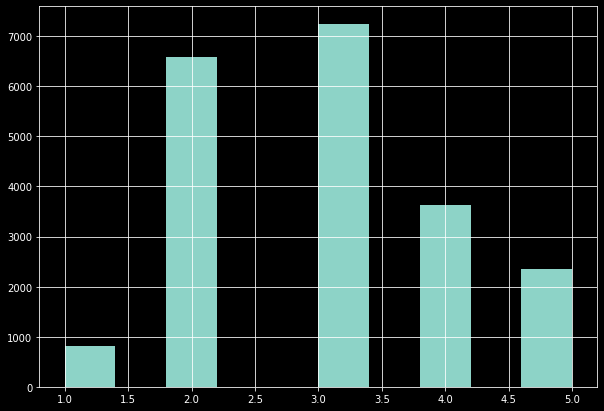

In [25]:
data['income_cat'] = pd.cut(data['median_income'],
                           bins = [0.0, 1.5, 3.0, 4.5, 6, np.inf],
                           labels = [1, 2, 3, 4, 5])

data.income_cat.hist(figsize = (10, 7))

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

for train_index, test_index in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [28]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
16507,-121.11,37.74,11.0,3886.0,599.0,1605.0,529.0,4.4213,182700.0,INLAND,3
958,-121.92,37.68,23.0,1655.0,223.0,706.0,219.0,7.2211,291900.0,<1H OCEAN,5
12407,-116.29,33.72,5.0,3584.0,760.0,1097.0,470.0,3.1771,167400.0,INLAND,3
4464,-118.19,34.08,35.0,1554.0,381.0,1487.0,374.0,1.9038,139500.0,<1H OCEAN,2
5677,-118.31,33.67,42.0,1297.0,246.0,611.0,242.0,5.3074,401900.0,NEAR OCEAN,4
...,...,...,...,...,...,...,...,...,...,...,...
6394,-118.06,34.14,42.0,2461.0,379.0,1179.0,360.0,7.0315,437300.0,INLAND,5
12868,-121.35,38.72,2.0,21897.0,3513.0,8652.0,2873.0,4.5432,151300.0,INLAND,4
10145,-117.90,33.91,33.0,4181.0,804.0,2049.0,834.0,4.3103,201600.0,<1H OCEAN,3
10944,-117.87,33.74,16.0,1243.0,365.0,1925.0,376.0,2.7632,158900.0,<1H OCEAN,2


In [29]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
7589,-118.23,33.90,45.0,1285.0,238.0,840.0,211.0,3.4107,112500.0,<1H OCEAN,3
2541,-124.17,40.80,52.0,1606.0,419.0,891.0,367.0,1.5850,75500.0,NEAR OCEAN,2
12347,-116.54,33.82,12.0,9482.0,2501.0,2725.0,1300.0,1.5595,115600.0,INLAND,2
16298,-121.22,37.96,31.0,1484.0,314.0,1163.0,336.0,2.6250,72100.0,INLAND,2
3111,-117.68,35.62,30.0,2994.0,741.0,1481.0,581.0,2.1458,52400.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
17123,-122.13,37.46,37.0,1576.0,334.0,1385.0,323.0,2.5294,159400.0,NEAR BAY,2
12548,-121.48,38.55,52.0,2037.0,358.0,811.0,375.0,4.3929,162500.0,INLAND,3
12267,-116.91,33.75,13.0,10886.0,2127.0,4266.0,1955.0,2.3169,123400.0,INLAND,2
18524,-122.04,36.98,51.0,1076.0,206.0,495.0,201.0,2.9286,258300.0,NEAR OCEAN,2


In [30]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [31]:
strat_train_set['income_cat'].value_counts()

3    5789
2    5265
4    2911
5    1889
1     658
Name: income_cat, dtype: int64

In [32]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

In [33]:
strat_test_set.shape

(4128, 10)

In [34]:
temp = strat_train_set.copy()

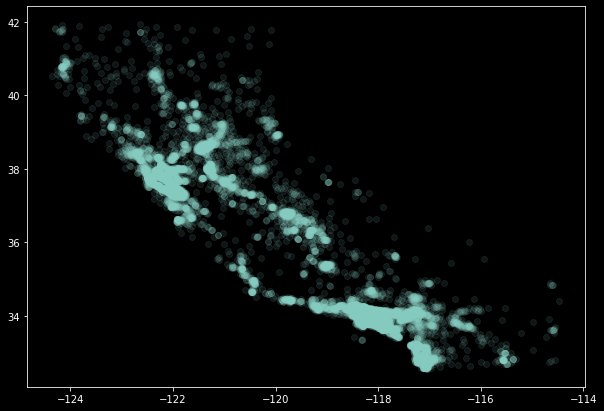

In [35]:
plt.figure(figsize = (10, 7))
plt.scatter(temp['longitude'], temp['latitude'], alpha = 0.1)

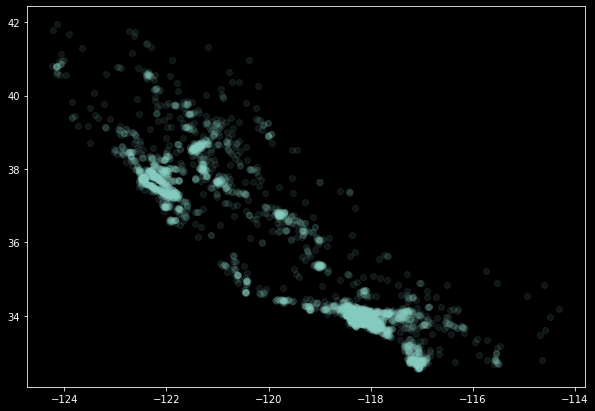

In [36]:
plt.figure(figsize = (10, 7))
plt.scatter(strat_test_set['longitude'], strat_test_set['latitude'], alpha = 0.1)

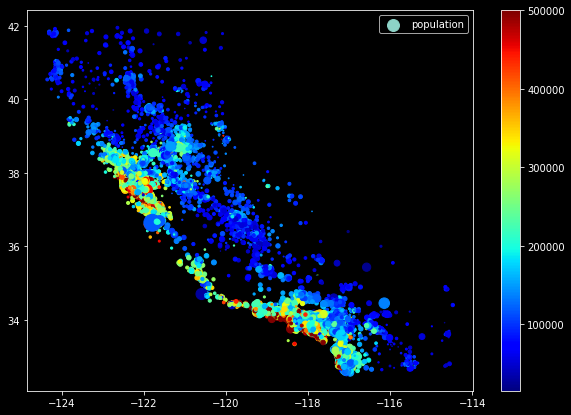

In [37]:
plt.figure(figsize = (10, 7))
plt.scatter(temp.longitude, temp.latitude, c = temp.median_house_value,
           s = temp.population/100, cmap = plt.get_cmap('jet'), label = 'population')
plt.legend()
plt.colorbar()

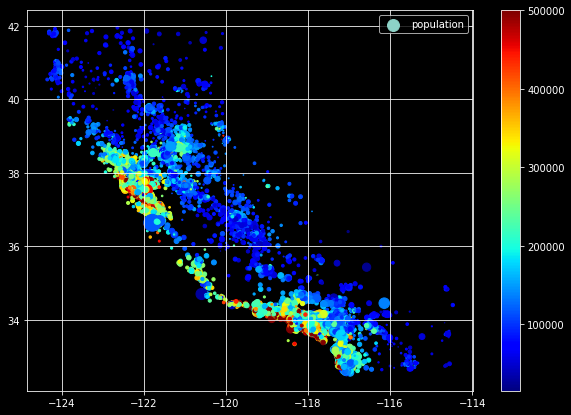

In [38]:
plt.figure(figsize = (10, 7))
plt.scatter(temp.longitude, temp.latitude, c = temp.median_house_value,
           s = temp.population/100, cmap = plt.get_cmap('jet'), label = 'population')
plt.colorbar()
plt.legend()
plt.grid(True)

In [39]:
corr_matrix = data.corr() # core-relation coefficient

In [40]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [41]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [42]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D85C399208>,
      dtype=object)

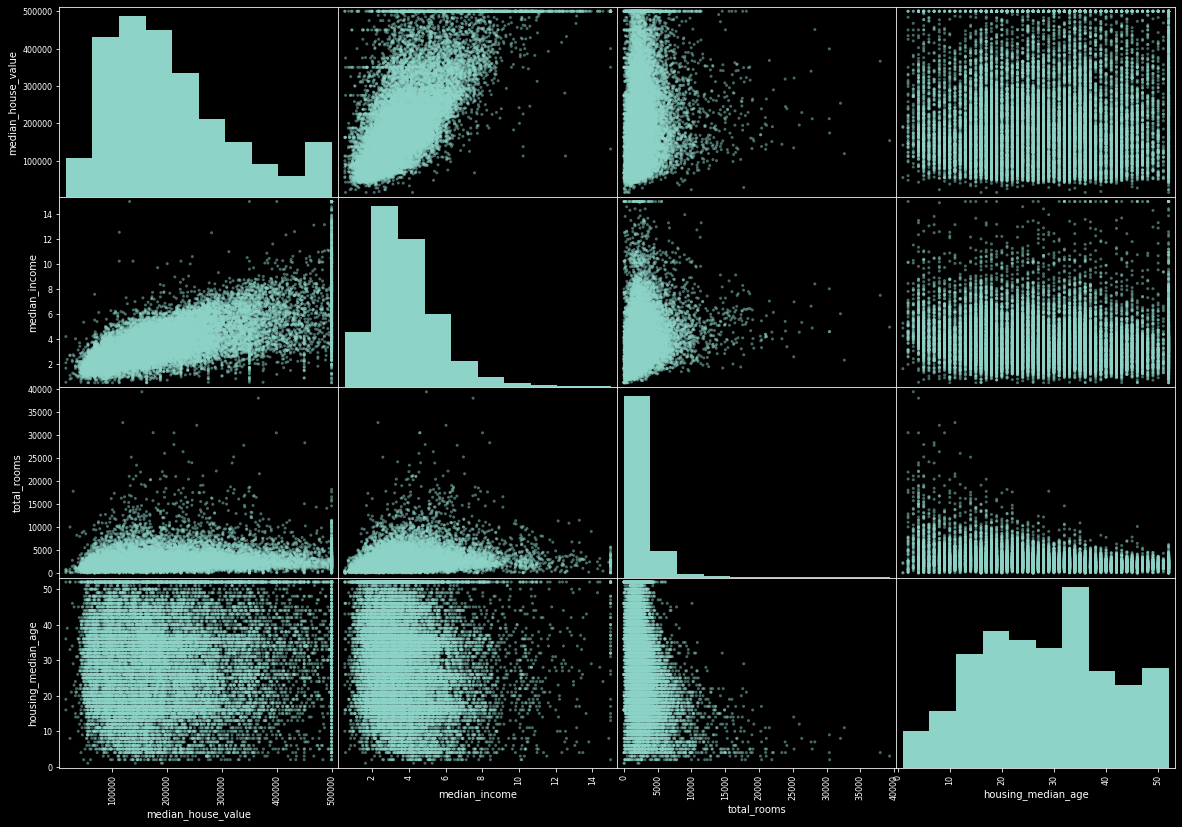

In [43]:
attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']

scatter_matrix(data[attributes], figsize = (20, 14))

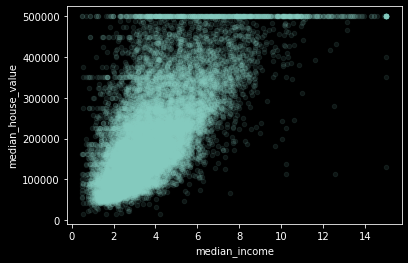

In [44]:
data.plot(kind = 'scatter', x = 'median_income',
          y = 'median_house_value', alpha = 0.1)

In [45]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [46]:
corr_matrix = data.corr()

In [47]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


In [48]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [49]:
housing_x = strat_train_set.drop('median_house_value', axis = 1)
housing_y = strat_test_set['median_house_value'].copy()

In [50]:
# Option 1:
# housing_x.dropna(subset = ['total_bedrooms'])

# Option 2:
# housing_x.drop('total_bedrooms', axis = 1)

# Option 3:
# median = housing_x.total_bedrooms.median()
# housing_x.fillna(median, inplace = True)

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(strategy = 'median')

In [53]:
housing_num = housing_x.drop('ocean_proximity', axis = 1)

In [54]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [55]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2126.     ,  434.     ,
       1164.     ,  409.     ,    3.53485])

In [56]:
housing_num.median()

longitude             -118.50000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2126.00000
total_bedrooms         434.00000
population            1164.00000
households             409.00000
median_income            3.53485
dtype: float64

In [57]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2126.     ,  434.     ,
       1164.     ,  409.     ,    3.53485])

In [58]:
# np_array = imputer.transform(housing_num)
# data_frame = pd.DataFrame(np_array, columns = housing_num.columns)

In [59]:
housing_cat = housing_x[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
16507,INLAND
958,<1H OCEAN
12407,INLAND
4464,<1H OCEAN
5677,NEAR OCEAN
994,INLAND
15347,<1H OCEAN
1889,INLAND
4130,<1H OCEAN
12617,INLAND


In [60]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [61]:
ordinal_encoder = OrdinalEncoder()

In [62]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [63]:
housing_cat_encoded.max()

4.0

In [64]:
housing_cat_encoded.min()

0.0

In [65]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
one_hot_encoder = OneHotEncoder()

In [71]:
housing_one_hot_encoded = one_hot_encoder.fit_transform(housing_cat)

In [78]:
housing_one_hot_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [75]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [76]:
housing_cat

,ocean_proximity
16507,INLAND
958,<1H OCEAN
12407,INLAND
4464,<1H OCEAN
5677,NEAR OCEAN
...,...
6394,INLAND
12868,INLAND
10145,<1H OCEAN
10944,<1H OCEAN
